Make Regression 

In [3]:
import pandas as pd
from sklearn.datasets import make_regression, make_classification, make_blobs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [4]:
features, target, coefficients = make_regression(n_samples=100,
                                                 n_features=3,
                                                 n_informative=2,
                                                 n_targets=1,
                                                 noise=0.0,
                                                 coef=True,
                                                 random_state=1)

In [5]:
print('features Matrix', features[:3])

features Matrix [[-1.1191154  -0.89055558  1.9560789 ]
 [ 0.84616065  0.31515939 -0.85951594]
 [ 0.58281521  0.04221375 -1.10061918]]


In [6]:
print('target Matrix', target[:3])

target Matrix [-104.43925569   63.13782001   35.76065963]


In [7]:
print('Coeff', coefficients)

Coeff [58.15774073 44.19042807  0.        ]


Make Classification 

In [8]:
features1, target1 = make_classification(n_samples=100,
                                                 n_features=3,
                                                 n_informative=3,
                                                 n_redundant=0,
                                                 n_classes=2,
                                                 weights=[.25, .75],
                                                 random_state=1)

In [9]:
print(type(features1))
print(type(target1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
df = pd.DataFrame(data=features, columns=['feature1','feature2','feature3' ])
df['target'] = target

In [11]:
df.head(4)

,feature1,feature2,feature3,target
0,-1.119115,-0.890556,1.956079,-104.439256
1,0.846161,0.315159,-0.859516,63.137820
2,0.582815,0.042214,-1.100619,35.760660
3,2.528326,0.901487,-0.248635,186.878803


In [12]:
df.shape

(100, 4)

create unsupervised datframe

In [13]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2,random_state=1) # type: ignore

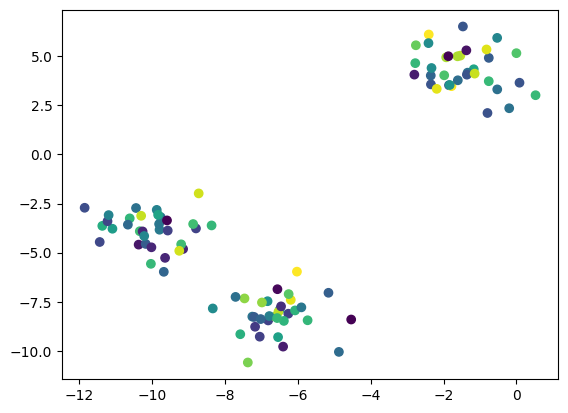

In [32]:
#colors = ['red','green']
colors = np.random.rand(100)
plt.scatter(x=X[:,0],y=X[:,1], c=colors)

In [15]:
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv'

In [16]:
dataframe = pd.read_csv(url)

In [17]:
dataframe.shape

(1313, 6)

In [18]:
dataframe.head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [19]:
dataframe.isnull().mean()

Name        0.000000
PClass      0.000000
Age         0.424219
Sex         0.000000
Survived    0.000000
SexCode     0.000000
dtype: float64

In [20]:
dataframe.describe(percentiles=[.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])
#dataframe.describe()


,Age,Survived,SexCode
count,756.000000,1313.000000,1313.000000
mean,30.397989,0.342727,0.351866
std,14.259049,0.474802,0.477734
min,0.170000,0.000000,0.000000
1%,1.000000,0.000000,0.000000
10%,16.000000,0.000000,0.000000
20%,20.000000,0.000000,0.000000
30%,22.000000,0.000000,0.000000
40%,25.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000


Creating DataFrame from Dictionary      

In [21]:
names = ['A','B','C','']
degree = ['B.A.','','B.C.A','M.B.A']
score = [89, 87.50,70,0]
user_dict = {'Name':names,'Program':degree, 'Marks':score}
dict_DF = pd.DataFrame(user_dict)
dict_DF.set_index('Name', inplace=True)
dict_DF

,Program,Marks
Name,,
A,B.A.,89.0
B,,87.5
C,B.C.A,70.0
,M.B.A,0.0


In [22]:
print(dict_DF.index.name)

Name


In [23]:
dict_DF.to_csv('dictDataFrame.csv')

In [24]:
dict_DF.to_json('dictDataFrame.json')

Creating Database

In [25]:
import sqlite3
con = sqlite3.connect("tutorial.db")
cur = con.cursor()

In [26]:
# Create Table
# dt = '''CREATE TABLE employee(
#     first_name CHAR(30) NOT NULL,
#     last_name CHAR(30),
#     age INT NOT NULL,
#     sex CHAR(1),
#     income FLOAT
# )
# '''
# cur.execute(dt)
# con.commit()

In [27]:
# Insert data into table
sql_query = '''INSERT INTO employee VALUES ('Prabhjeet','Singh',28,'M',100)
'''
cur.execute(sql_query)
sql_query = '''INSERT INTO employee VALUES ('Rahul','Singh',29,'M',100)
'''
cur.execute(sql_query)
con.commit()

In [28]:
# DELETE data from table
sql_query = '''DELETE FROM employee WHERE first_name="Prabhjeet"'''
cur.execute(sql_query)
con.commit()

In [29]:
# READ data from table
sql_query = '''SELECT * FROM employee'''
cur.execute(sql_query)
result= cur.fetchall()
print(result)

[('Rahul', 'Singh', 29, 'M', 100.0), ('Rahul', 'Singh', 29, 'M', 100.0)]
